In [1]:
def runge_kutta_method(t, h, x, func):
    k1 = func(t, x) * h
    k2 = func(t + h / 2.0, x + k1 / 2.0) * h
    k3 = func(t + h / 2.0, x + k2 / 2.0) * h
    k4 = func(t + h, x + k3) * h
    return x + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0

In [2]:
HUBBLE_CONSTANT = 72.0

OMEGA_MATTER = 0.3
OMEGA_DARK_ENERGY = 0.7

In [3]:
import math

def square_root_friedmann_eq(t, scale_factor):
    diff_scale_factor = HUBBLE_CONSTANT \
    * math.sqrt(OMEGA_MATTER / scale_factor + OMEGA_DARK_ENERGY * scale_factor**2)
    return diff_scale_factor

In [4]:
# H_0 ≒ 72 km/Mpc/sec
# 時間の単位 -> sec Mpc / km

def rescale_time(t):
    return t / 3.24078e-20 / 3.1536e15

In [15]:
time_list = []
scale_factor_list = []

h = 0.0001
t = 0.0
# initial scale factor value.
scale_factor = 1.0e-3

for i in range(0, 300):
    scale_factor = runge_kutta_method(t, h, scale_factor, square_root_friedmann_eq)
    time_list.append(rescale_time(t))
    scale_factor_list.append(scale_factor)
    t = t + h

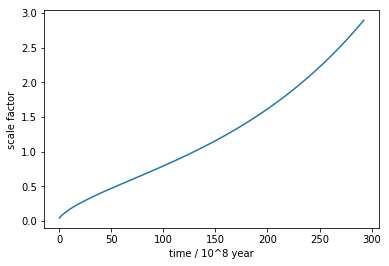

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.xlabel('time / 10^8 year')
plt.ylabel('scale factor')
plt.plot(time_list, scale_factor_list)